In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string

In [3]:
dft=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\test_oJQbWVk.csv')

In [4]:
dft.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
df=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\train_2kmZucJ.csv')

In [6]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [7]:
df.shape

(7920, 3)

In [8]:
dft.shape

(1953, 2)

In [9]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
dft.isnull().sum()

id       0
tweet    0
dtype: int64

In [11]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ananyya
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df.label.value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
stop = stopwords.words('english') 

In [17]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [18]:
dft.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


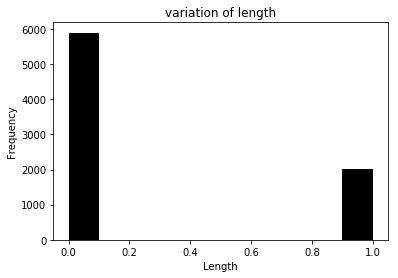

In [19]:
df.groupby('tweet').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

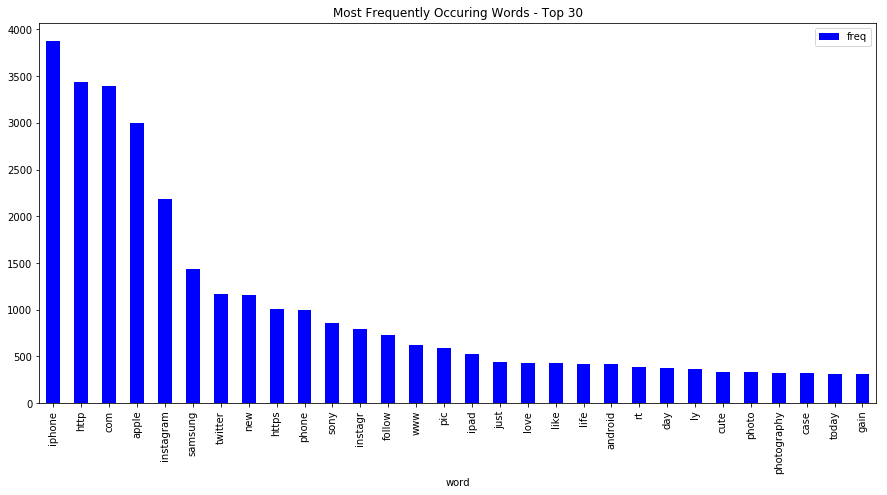

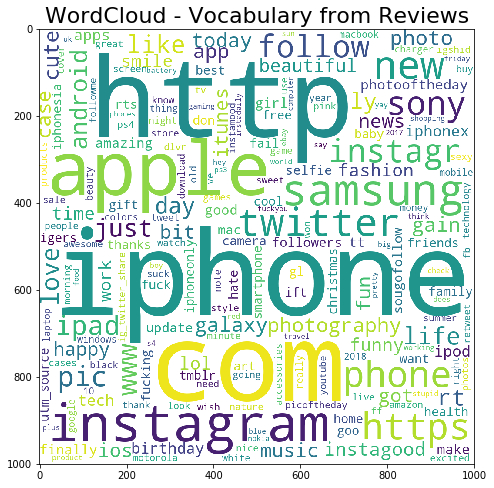

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)



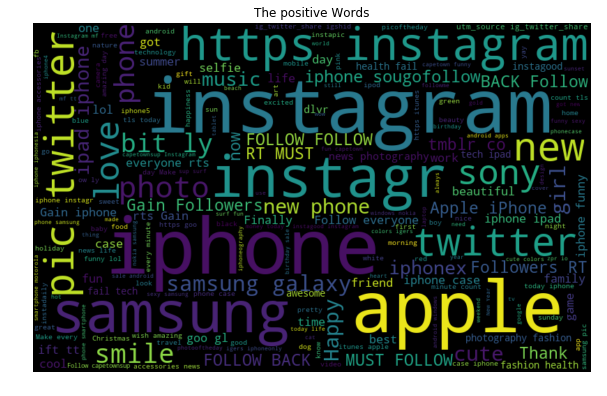

In [21]:
normal_words =' '.join([text for text in df['tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The positive Words')
plt.show()



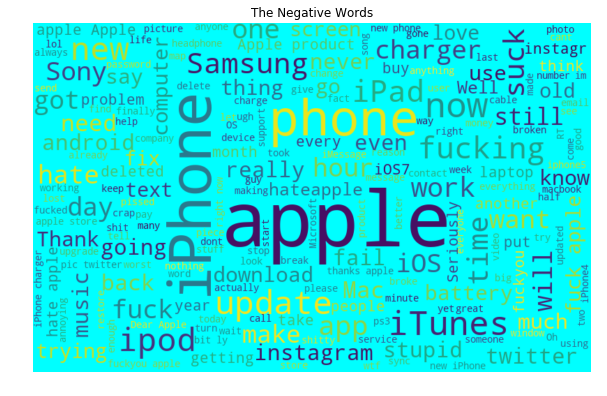

In [22]:
negative_words =' '.join([text for text in df['tweet'][df['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [23]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",tweet.lower()).split())

In [24]:
df['tweet'].apply(process_tweet)

0       fingerprint pregnancy test httpsgooglh1mfqv an...
1       finally a transparant silicon case thanks to m...
2       we love this would you go talk makememories un...
3       im wired i know im george i was made that way ...
4       what amazing service apple wont even talk to m...
                              ...                        
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

train_corpus = []

for i in range(0, 7920):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)



In [26]:
test_corpus = []

for i in range(0,1953):
    review = re.sub('[^a-zA-Z]', ' ', dft['tweet'][i])
    review = review.lower()
    review = review.split()
  
    ps = PorterStemmer()
  
  # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)

In [27]:
df['clean_tweets']=df.tweet.apply(process_tweet)

In [28]:
df.head()

,id,label,tweet,clean_tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test httpsgooglh1mfqv an...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,im wired i know im george i was made that way ...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple wont even talk to m...


In [29]:
dft['clean_tweets']=dft.tweet.apply(process_tweet)

In [30]:
dft.head()

,id,tweet,clean_tweets
0,7921,I hate the new #iphone upgrade. Won't let me d...,i hate the new iphone upgrade wont let me down...
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting my fucking pants apple imac...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",id like to puts some cdroms on my ipad is that...
3,7924,My ipod is officially dead. I lost all my pict...,my ipod is officially dead i lost all my pictu...
4,7925,Been fighting iTunes all night! I only want th...,been fighting itunes all night i only want the...


In [31]:
df.clean_tweets[3]

'im wired i know im george i was made that way iphone cute daventry home httpinstagrampli5ujs4k'

In [32]:
test_corpus[3]

'ipod offici dead lost pictur video so concert vet camp hatinglif sob'

In [33]:
train_corpus[3]

'wire know georg made way iphon cute daventri home http instagr p li uj k'

In [34]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = df.iloc[:, 1]

print(x.shape)
print(y.shape)
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)



(7920, 2500)
(7920,)
(1953, 2500)


In [35]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

(5940, 2500)
(1980, 2500)
(5940,)
(1980,)


In [36]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))




Training Accuracy : 0.8883838383838384
Validation Accuracy : 0.8792929292929293


In [37]:
from sklearn.metrics import confusion_matrix
#confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[1288  151]
 [  88  453]]


In [38]:
from sklearn.metrics import f1_score
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))


f1 score : 0.7912663755458514


In [65]:
pred=model.predict(x_test)

In [66]:
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [67]:
x_test.shape

(1953, 2500)

In [68]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [69]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\ananyya
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ananyya
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ananyya
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
sample=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\twitter.csv')

In [71]:
sample.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [72]:
sample.label=pred

In [73]:
sample.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [74]:
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [75]:
sample.label.value_counts()

1    1907
0      46
Name: label, dtype: int64

In [76]:
sample.to_csv(r'C:\Users\ananyya srivastava\Desktop\sub.csv',index=False)